## Libraries

In [11]:
import cv2
import pygame
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

pygame 2.5.2 (SDL 2.28.3, Python 3.9.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Keypoints using MP Holistic

In [3]:
mp_holistic=mp.solutions.holistic # Holistic model
mp_drawing=mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     # COLOR VERSION BGR 2 RGB
    image.flags.writeable=False                      # Image is no longer writeable
    results=model.process(image)                     # Make prediction
    image.flags.writeable=True                       # Image is now writeable
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)     # COLOR VERSION RGB 2 BGR
    return image, results

[FACE CONNECTIONS -> FACEMESH](https://stackoverflow.com/questions/69095372/attributeerror-module-mediapipe-python-solutions-holistic-has-no-attribute-f)

In [27]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [5]:
cv2.cvtColor??

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

In [19]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
          

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)        # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)            # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)       # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)      # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, 
                              mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                              )
    # Draw pose connections        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, 
                              mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                              )
    # Draw left hand connections           
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80, 44, 250), thickness=2, circle_radius=2)
                              )
    # Draw right hand connections       
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                              )      

In [74]:
cap=cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret, frame=cap.read()
        
        # Make detections
        image, results=mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [75]:
len(results.right_hand_landmarks.landmark)

21

In [76]:
results

mediapipe.python.solution_base.SolutionOutputs

In [77]:
draw_styled_landmarks(frame, results)

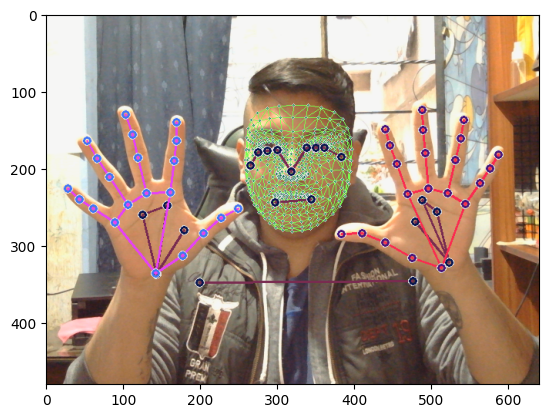

In [78]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keypoint Values

In [79]:
results.face_landmarks

landmark {
  x: 0.4968578815460205
  y: 0.4795977473258972
  z: -0.025007573887705803
}
landmark {
  x: 0.4948473870754242
  y: 0.4392530620098114
  z: -0.05036262422800064
}
landmark {
  x: 0.497033029794693
  y: 0.45168739557266235
  z: -0.025677749887108803
}
landmark {
  x: 0.48928096890449524
  y: 0.3940297067165375
  z: -0.03764056786894798
}
landmark {
  x: 0.4947758615016937
  y: 0.42536941170692444
  z: -0.05387900024652481
}
landmark {
  x: 0.49567270278930664
  y: 0.4070129990577698
  z: -0.05047786608338356
}
landmark {
  x: 0.4988972544670105
  y: 0.36348697543144226
  z: -0.02670375071465969
}
landmark {
  x: 0.43717455863952637
  y: 0.3595643639564514
  z: 0.019692741334438324
}
landmark {
  x: 0.5000196695327759
  y: 0.335132360458374
  z: -0.021417003124952316
}
landmark {
  x: 0.5000784397125244
  y: 0.31787073612213135
  z: -0.024035075679421425
}
landmark {
  x: 0.5017237067222595
  y: 0.24717216193675995
  z: -0.01516078319400549
}
landmark {
  x: 0.496884226799011

In [80]:
results.pose_landmarks

landmark {
  x: 0.4972839951515198
  y: 0.42563483119010925
  z: -0.7131379246711731
  visibility: 0.9999940991401672
}
landmark {
  x: 0.5285588502883911
  y: 0.36108142137527466
  z: -0.6480065584182739
  visibility: 0.9999869465827942
}
landmark {
  x: 0.5470814108848572
  y: 0.3606906831264496
  z: -0.6474530100822449
  visibility: 0.9999855756759644
}
landmark {
  x: 0.564376711845398
  y: 0.3604694604873657
  z: -0.6466450095176697
  visibility: 0.9999862909317017
}
landmark {
  x: 0.4690943658351898
  y: 0.36737436056137085
  z: -0.6213990449905396
  visibility: 0.9999852180480957
}
landmark {
  x: 0.449055016040802
  y: 0.370620995759964
  z: -0.6204982399940491
  visibility: 0.9999805688858032
}
landmark {
  x: 0.4305473268032074
  y: 0.3746005892753601
  z: -0.6205600500106812
  visibility: 0.9999824166297913
}
landmark {
  x: 0.5988760590553284
  y: 0.386977881193161
  z: -0.2985537350177765
  visibility: 0.9999875426292419
}
landmark {
  x: 0.4141351282596588
  y: 0.4088969

In [81]:
results.left_hand_landmarks

landmark {
  x: 0.8030701875686646
  y: 0.6868695616722107
  z: 4.530145645276207e-07
}
landmark {
  x: 0.7434049248695374
  y: 0.6601395010948181
  z: -0.022609492763876915
}
landmark {
  x: 0.68829345703125
  y: 0.6175793409347534
  z: -0.0387536846101284
}
landmark {
  x: 0.6419780254364014
  y: 0.593410849571228
  z: -0.05426158010959625
}
landmark {
  x: 0.5994139909744263
  y: 0.5946398973464966
  z: -0.07192828506231308
}
landmark {
  x: 0.7340107560157776
  y: 0.48714548349380493
  z: -0.028494199737906456
}
landmark {
  x: 0.711268961429596
  y: 0.40614816546440125
  z: -0.04775584116578102
}
landmark {
  x: 0.6982814073562622
  y: 0.35615283250808716
  z: -0.06431251764297485
}
landmark {
  x: 0.6882106065750122
  y: 0.3110780715942383
  z: -0.07747761160135269
}
landmark {
  x: 0.7752928733825684
  y: 0.47282516956329346
  z: -0.03529529646039009
}
landmark {
  x: 0.768796980381012
  y: 0.37542492151260376
  z: -0.050849344581365585
}
landmark {
  x: 0.7654407024383545
  y: 

In [82]:
len(results.pose_landmarks.landmark)

33

In [83]:
results.pose_landmarks.landmark[0]

x: 0.4972839951515198
y: 0.42563483119010925
z: -0.7131379246711731
visibility: 0.9999940991401672

In [84]:
results.pose_landmarks.landmark[0].x

0.4972839951515198

In [85]:
results.pose_landmarks.landmark[0].y

0.42563483119010925

In [86]:
results.pose_landmarks.landmark[0].z

-0.7131379246711731

In [87]:
results.pose_landmarks.landmark[0].visibility

0.9999940991401672

#### Input Data
The input data used for this action detection model is a series of 30 arrays eachof which contains 1662 values (30, 1662).<br>
Each of the 30 arrays represents the landmark values (1662 values) from a single frame.

In [88]:
pose=[]

for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [89]:
pose

[array([ 0.497284  ,  0.42563483, -0.71313792,  0.9999941 ]),
 array([ 0.52855885,  0.36108142, -0.64800656,  0.99998695]),
 array([ 0.54708141,  0.36069068, -0.64745301,  0.99998558]),
 array([ 0.56437671,  0.36046946, -0.64664501,  0.99998629]),
 array([ 0.46909437,  0.36737436, -0.62139904,  0.99998522]),
 array([ 0.44905502,  0.370621  , -0.62049824,  0.99998057]),
 array([ 0.43054733,  0.37460059, -0.62056005,  0.99998242]),
 array([ 0.59887606,  0.38697788, -0.29855374,  0.99998754]),
 array([ 0.41413513,  0.40889692, -0.15563136,  0.99998271]),
 array([ 0.53814399,  0.50196803, -0.59492886,  0.99998534]),
 array([ 0.46424308,  0.50858229, -0.55719018,  0.99998289]),
 array([ 0.74384922,  0.72136325, -0.12846003,  0.99971157]),
 array([0.31117675, 0.72683728, 0.03405511, 0.99939412]),
 array([ 0.94672883,  1.05736303, -0.6732257 ,  0.94798994]),
 array([ 0.13065739,  1.14478612, -0.54325724,  0.95348299]),
 array([ 0.8174904 ,  0.67170006, -1.08153641,  0.99802172]),
 array([ 0.2

In [90]:
len(pose)

33

In [91]:
# Using list comprenhesion
pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [92]:
pose

array([[ 4.97283995e-01,  4.25634831e-01, -7.13137925e-01,
         9.99994099e-01],
       [ 5.28558850e-01,  3.61081421e-01, -6.48006558e-01,
         9.99986947e-01],
       [ 5.47081411e-01,  3.60690683e-01, -6.47453010e-01,
         9.99985576e-01],
       [ 5.64376712e-01,  3.60469460e-01, -6.46645010e-01,
         9.99986291e-01],
       [ 4.69094366e-01,  3.67374361e-01, -6.21399045e-01,
         9.99985218e-01],
       [ 4.49055016e-01,  3.70620996e-01, -6.20498240e-01,
         9.99980569e-01],
       [ 4.30547327e-01,  3.74600589e-01, -6.20560050e-01,
         9.99982417e-01],
       [ 5.98876059e-01,  3.86977881e-01, -2.98553735e-01,
         9.99987543e-01],
       [ 4.14135128e-01,  4.08896923e-01, -1.55631363e-01,
         9.99982715e-01],
       [ 5.38143992e-01,  5.01968026e-01, -5.94928861e-01,
         9.99985337e-01],
       [ 4.64243084e-01,  5.08582294e-01, -5.57190180e-01,
         9.99982893e-01],
       [ 7.43849218e-01,  7.21363246e-01, -1.28460035e-01,
      

In [93]:
pose.shape

(33, 4)

Let's try with left hand landmarks. It has one third of the connections registered in Pose Connections.

In [94]:
results.left_hand_landmarks.landmark

[x: 0.8030701875686646
y: 0.6868695616722107
z: 4.530145645276207e-07
, x: 0.7434049248695374
y: 0.6601395010948181
z: -0.022609492763876915
, x: 0.68829345703125
y: 0.6175793409347534
z: -0.0387536846101284
, x: 0.6419780254364014
y: 0.593410849571228
z: -0.05426158010959625
, x: 0.5994139909744263
y: 0.5946398973464966
z: -0.07192828506231308
, x: 0.7340107560157776
y: 0.48714548349380493
z: -0.028494199737906456
, x: 0.711268961429596
y: 0.40614816546440125
z: -0.04775584116578102
, x: 0.6982814073562622
y: 0.35615283250808716
z: -0.06431251764297485
, x: 0.6882106065750122
y: 0.3110780715942383
z: -0.07747761160135269
, x: 0.7752928733825684
y: 0.47282516956329346
z: -0.03529529646039009
, x: 0.768796980381012
y: 0.37542492151260376
z: -0.050849344581365585
, x: 0.7654407024383545
y: 0.3128715455532074
z: -0.06645573675632477
, x: 0.7638550400733948
y: 0.2591620683670044
z: -0.07954451441764832
, x: 0.8149069547653198
y: 0.4833779036998749
z: -0.04509207606315613
, x: 0.83071988821

In [95]:
len(results.left_hand_landmarks.landmark)*3

63

In [96]:
lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark])
lh

array([[ 8.03070188e-01,  6.86869562e-01,  4.53014565e-07],
       [ 7.43404925e-01,  6.60139501e-01, -2.26094928e-02],
       [ 6.88293457e-01,  6.17579341e-01, -3.87536846e-02],
       [ 6.41978025e-01,  5.93410850e-01, -5.42615801e-02],
       [ 5.99413991e-01,  5.94639897e-01, -7.19282851e-02],
       [ 7.34010756e-01,  4.87145483e-01, -2.84941997e-02],
       [ 7.11268961e-01,  4.06148165e-01, -4.77558412e-02],
       [ 6.98281407e-01,  3.56152833e-01, -6.43125176e-02],
       [ 6.88210607e-01,  3.11078072e-01, -7.74776116e-02],
       [ 7.75292873e-01,  4.72825170e-01, -3.52952965e-02],
       [ 7.68796980e-01,  3.75424922e-01, -5.08493446e-02],
       [ 7.65440702e-01,  3.12871546e-01, -6.64557368e-02],
       [ 7.63855040e-01,  2.59162068e-01, -7.95445144e-02],
       [ 8.14906955e-01,  4.83377904e-01, -4.50920761e-02],
       [ 8.30719888e-01,  3.94538522e-01, -6.50288016e-02],
       [ 8.40873301e-01,  3.37002367e-01, -8.20973366e-02],
       [ 8.48025203e-01,  2.86135554e-01

In [97]:
rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark])
rh

array([[ 2.22542673e-01,  7.00134575e-01,  5.90429352e-07],
       [ 2.77163386e-01,  6.53699160e-01, -3.18251327e-02],
       [ 3.19756746e-01,  5.93571961e-01, -5.24937212e-02],
       [ 3.54899406e-01,  5.51915646e-01, -7.19668344e-02],
       [ 3.89479101e-01,  5.26628077e-01, -9.27293152e-02],
       [ 2.51768112e-01,  4.83194977e-01, -4.50577959e-02],
       [ 2.60524392e-01,  3.96112740e-01, -7.20179230e-02],
       [ 2.64239579e-01,  3.41787905e-01, -9.09463987e-02],
       [ 2.64637798e-01,  2.92254567e-01, -1.04869463e-01],
       [ 2.04370722e-01,  4.85384375e-01, -4.86904010e-02],
       [ 1.87320203e-01,  3.88302863e-01, -7.31476769e-02],
       [ 1.75487787e-01,  3.25897962e-01, -9.10540447e-02],
       [ 1.61183864e-01,  2.71787196e-01, -1.04064755e-01],
       [ 1.66955531e-01,  5.14604390e-01, -5.51417060e-02],
       [ 1.28346160e-01,  4.40655708e-01, -7.98011795e-02],
       [ 1.03913762e-01,  3.90977383e-01, -9.75078121e-02],
       [ 8.28331262e-02,  3.43350708e-01

21 landmarks by 3 coordinate values each

In [98]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21, 3)

In [100]:
lh

array([ 8.03070188e-01,  6.86869562e-01,  4.53014565e-07,  7.43404925e-01,
        6.60139501e-01, -2.26094928e-02,  6.88293457e-01,  6.17579341e-01,
       -3.87536846e-02,  6.41978025e-01,  5.93410850e-01, -5.42615801e-02,
        5.99413991e-01,  5.94639897e-01, -7.19282851e-02,  7.34010756e-01,
        4.87145483e-01, -2.84941997e-02,  7.11268961e-01,  4.06148165e-01,
       -4.77558412e-02,  6.98281407e-01,  3.56152833e-01, -6.43125176e-02,
        6.88210607e-01,  3.11078072e-01, -7.74776116e-02,  7.75292873e-01,
        4.72825170e-01, -3.52952965e-02,  7.68796980e-01,  3.75424922e-01,
       -5.08493446e-02,  7.65440702e-01,  3.12871546e-01, -6.64557368e-02,
        7.63855040e-01,  2.59162068e-01, -7.95445144e-02,  8.14906955e-01,
        4.83377904e-01, -4.50920761e-02,  8.30719888e-01,  3.94538522e-01,
       -6.50288016e-02,  8.40873301e-01,  3.37002367e-01, -8.20973366e-02,
        8.48025203e-01,  2.86135554e-01, -9.49426815e-02,  8.50504994e-01,
        5.13601363e-01, -

In [101]:
len(results.face_landmarks.landmark)*3

1404

In [102]:
pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [8]:
def extract_keypoints(results):
    pose=np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [105]:
468*3+33*4+21*3+21*3

1662

In [106]:
result_test=extract_keypoints(results)
result_test

array([ 0.497284  ,  0.42563483, -0.71313792, ...,  0.04427227,
        0.47188753, -0.10649626])

In [107]:
result_test.shape

(1662,)

In [109]:
# If you want to save the results
np.save('0', result_test)

In [9]:
# If you want to loas the results
np.load('0.npy')

array([ 0.497284  ,  0.42563483, -0.71313792, ...,  0.04427227,
        0.47188753, -0.10649626])

## Setup Folders for Collection

Bibliografía para señas utilizadas:
- [hola](https://fundacioncnse-dilse.org/?buscar=hola#)
- [gracias](https://fundacioncnse-dilse.org/?buscar=agradecer#)
- [amor](https://fundacioncnse-dilse.org/?buscar=amor)

Nota: 'gracias' y 'amor' son utilizadas con sus versiones como verbos en infinitivo 'agradecer' y 'amar'

In [12]:
# Path for exported data, numpy arrays
DATA_PATH=os.path.join('MP_Data')

# Actions that we try to detect
actions=np.array(['hola', 'gracias', 'amor'])

# Thirty videos worth of data
no_sequences=30

# Videos are going to be 30 frames in length
sequence_length=30

#### Action Detection
A key difference between action detection and other computer vision tasks is tha a sequence of data rather than a single frame is used for detection.

In [13]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

#### Data
Just to recap, we're going to collect 30 videos per action i.e. hola, gracias, amor.
Then each one of those video sequences are going to contain 30 frames of data. each frame will contain 1662 landmark values i.e. 3*30 sequences, 30 frames, 1662 landmarks.

## Collect Keypoint Values for Training and Testing

Collection Breaks<br>
Having breaks between each sequence collection allows you to reset and reposition yourself to collect the action from start to finish.<br><br>
Shorten Breaks<br>
In order to shorten the break between sequences collected change the value in cv2.waitTime() to a lower value. To increase the time increase the value.<br><br>
Sound warnning<br>
The following lines of code are implemented to add a warning sound during the information capture each time the action (sign language) changes. [link](https://freesound.org/people/Thoribass/sounds/254819/)

In [14]:
# Initialize pygame mixer
pygame.mixer.init()

# Load sound
sound=pygame.mixer.Sound('notification-freesound.wav')

In [15]:
cap=cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # New Loop
    # Loop throug actions
    for action in actions:
        
        # Play sound when changing action
        sound.play(maxtime=2000) # Play only the first two seconds
        
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame=cap.read()
                
                # Make detections
                image, results=mediapipe_detection(frame, holistic)
                #print(results)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # New apply wait logic
                if frame_num==0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Videon Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show the screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # New export keypoints
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()